In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
email=pd.read_csv('emails.csv',encoding='latin-1')

In [3]:
email.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
email.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
email['length'] = email['text'].apply(len)
email.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [6]:
email.describe()

,spam,length
count,5728.000000,5728.000000
mean,0.238827,1556.768680
std,0.426404,2042.649812
min,0.000000,13.000000
25%,0.000000,508.750000
50%,0.000000,979.000000
75%,0.000000,1894.250000
max,1.000000,43952.000000


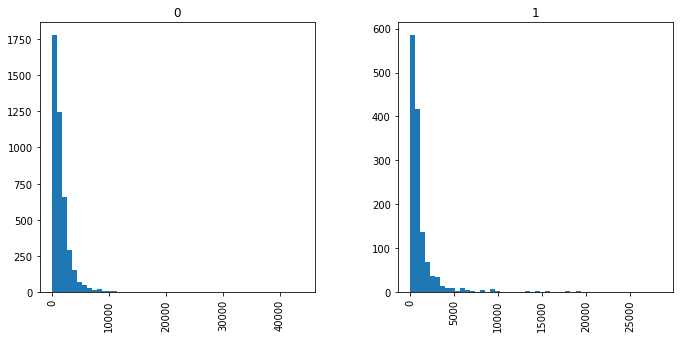

In [7]:
email.hist(column='length', by='spam', bins=50,figsize=(11,5))
plt.show()

In [9]:
message = email['text'].copy()

In [10]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk

%matplotlib inline

In [11]:
from nltk.corpus import stopwords

In [12]:
def text_processing(message1):
    
    message1 = message1.translate(str.maketrans('', '', string.punctuation))
    message1 = [word for word in message1.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(message1)

In [13]:
message = message.apply(text_processing)

In [14]:
message.head()

0    Subject naturally irresistible corporate ident...
1    Subject stock trading gunslinger fanny merrill...
2    Subject unbelievable new homes made easy im wa...
3    Subject 4 color printing special request addit...
4    Subject money get software cds software compat...
Name: text, dtype: object

In [15]:
vectorizer = TfidfVectorizer("english")
X = vectorizer.fit_transform(message)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, email['spam'], test_size = 0.2, random_state = 0)

In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print(svc.score(X_test,Y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7722513089005235
[[885   0]
 [261   0]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
print(classifier.score(X_test,Y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

0.8542757417102966
[[885   0]
 [167  94]]


In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
#regressor = LogisticRegressionCV(solver='lbfgs', multi_class='ovr')
#Y_train=Y_train.reshape(X_train.shape())
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

print(LR.score(X_test,Y_test))
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

0.9720767888307156
[[883   2]
 [ 30 231]]


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(X_train,Y_train)
Y_pred = DTC.predict(X_test)

print(DTC.score(X_test,Y_test))
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

0.956369982547993
[[856  29]
 [ 21 240]]


In [21]:
len= email['length'].values
X1 = np.hstack((X.todense(),len[:, None]))

In [22]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, email['spam'], test_size = 0.2, random_state = 0)

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X1_train, Y1_train)
Y1_pred = svc.predict(X1_test)
print(svc.score(X1_test,Y1_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y1_test, Y1_pred)
print(cm)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7722513089005235
[[883   2]
 [259   2]]


In [32]:
from sklearn.naive_bayes import GaussianNB 
GNB = GaussianNB()
GNB.fit(X1_train, Y1_train) 
Y1_pred = GNB.predict(X1_test) 
   
print(GNB.score(X1_test, Y1_test))  
cm = confusion_matrix(Y1_test, Y1_pred)
print(cm)

0.9729493891797557
[[877   8]
 [ 23 238]]


In [30]:
LR.fit(X1_train, Y1_train)
Y1_pred = LR.predict(X1_test)

print(LR.score(X1_test,Y1_test))
cm = confusion_matrix(Y1_test, Y1_pred)
print(cm)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.944153577661431
[[884   1]
 [ 63 198]]


In [31]:
DTC.fit(X1_train,Y1_train)
Y1_pred = DTC.predict(X1_test)

print(DTC.score(X1_test,Y1_test))
cm = confusion_matrix(Y1_test, Y1_pred)
print(cm)

0.956369982547993
[[853  32]
 [ 18 243]]
